<a href="https://www.kaggle.com/code/shruthyaravindmenon/eda-on-data-science-salaries-2023?scriptVersionId=128067111" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/data-science-salaries-2023'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-salaries-2023/ds_salaries.csv


In [2]:
df=pd.read_csv("/kaggle/input/data-science-salaries-2023/ds_salaries.csv")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [5]:
df.shape # 3755 rows and 11 columns

(3755, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [7]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [8]:
df.isnull().sum() # no null values

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
df.drop_duplicates().reset_index(drop=True) #dropped duplicates

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
2579,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
2580,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
2581,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
2582,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [10]:
#Feature Engineering
df['work_year'].value_counts()

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

Text(0.5, 0, 'Salary paid Year')

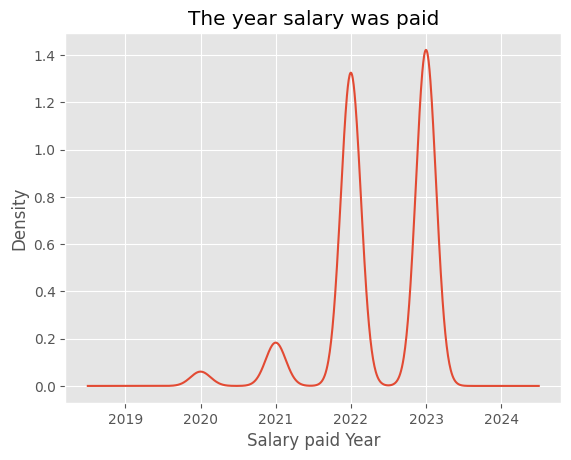

In [11]:
ax=df['work_year'].plot(kind='kde',title="The year salary was paid")
ax.set_xlabel("Salary paid Year")


Text(0.5, 0, 'Experience Level')

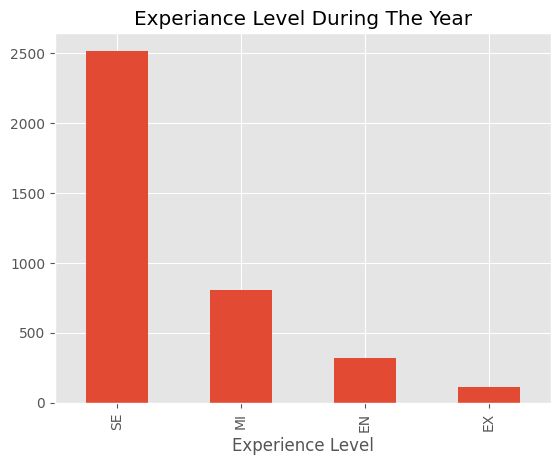

In [12]:
#experience_level: The experience level in the job during the year
ax=df['experience_level'].value_counts().plot(kind='bar',title="Experiance Level During The Year")
ax.set_xlabel("Experience Level")

Text(0.5, 0, 'Employment Type')

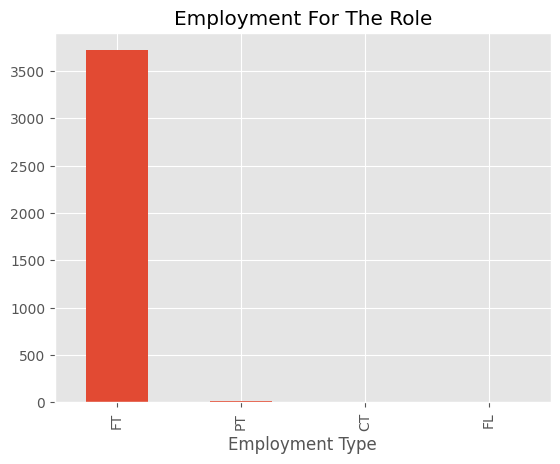

In [13]:
#employment_type: The type of employment for the role
ax=df['employment_type'].value_counts().plot(kind='bar',title="Employment For The Role")
ax.set_xlabel("Employment Type")

Text(0.5, 0, 'Job Role')

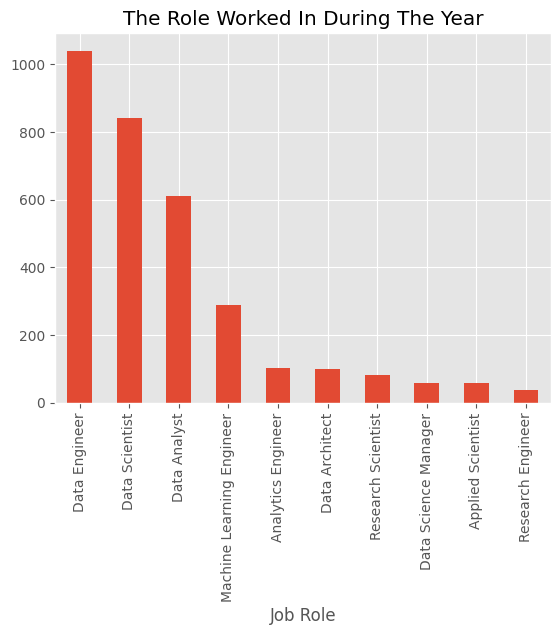

In [14]:
#job_title: The role worked in during the year.
ax=df['job_title'].value_counts().head(10).plot(kind='bar',title="The Role Worked In During The Year")
ax.set_xlabel("Job Role")

Text(0.5, 0, 'Salary')

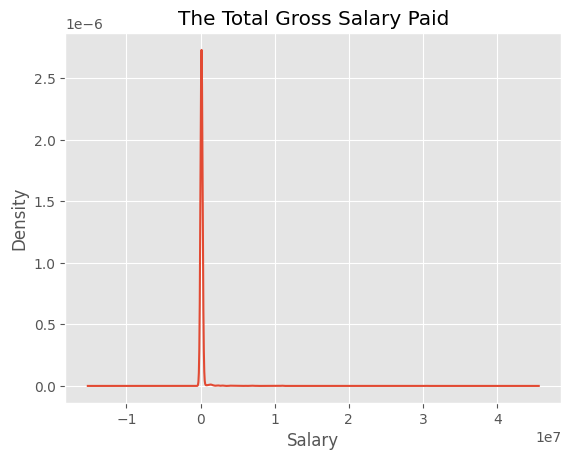

In [15]:
#salary: The total gross salary amount paid.
ax=df['salary'].plot(kind='kde',title="The Total Gross Salary Paid")
ax.set_xlabel("Salary")


Text(0.5, 0, 'Salary Currency Paid')

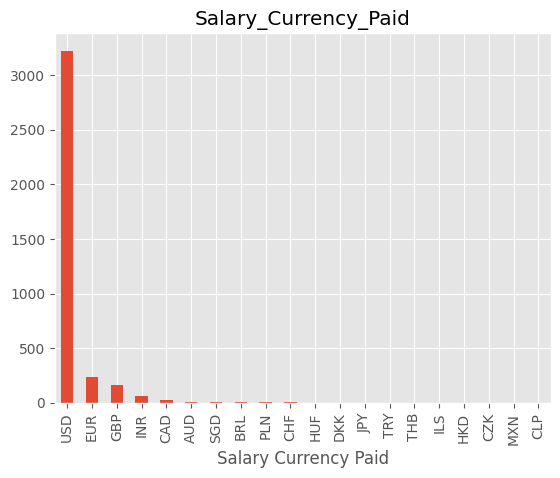

In [16]:
#salary_currency: The currency of the salary paid as an ISO 4217 currency code.
ax=df['salary_currency'].value_counts().plot(kind='bar',title="Salary_Currency_Paid")
ax.set_xlabel("Salary Currency Paid")

Text(0.5, 0, 'Salary In USD')

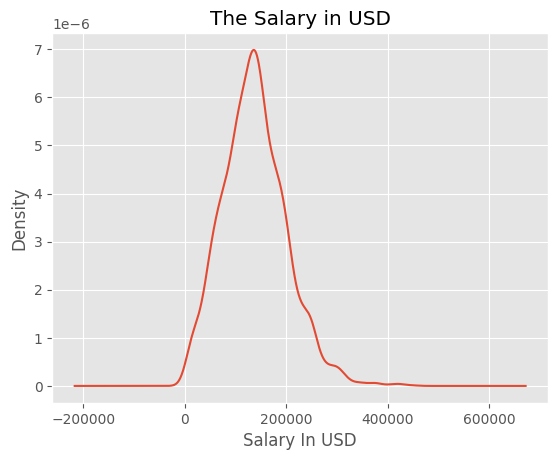

In [17]:
#salaryinusd: The salary in USD
ax=df['salary_in_usd'].plot(kind='kde',title="The Salary in USD")
ax.set_xlabel("Salary In USD")


Text(0.5, 0, 'Employees Country Of Residence ')

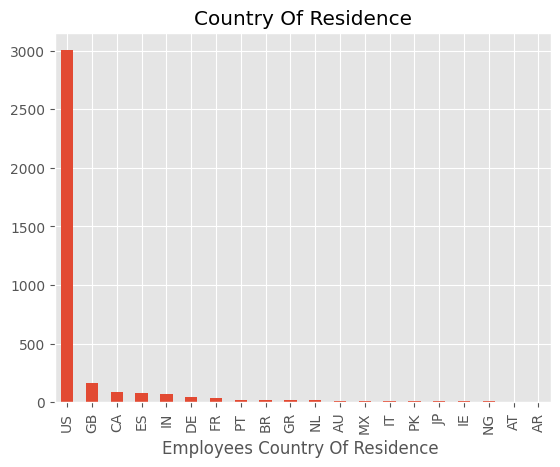

In [18]:
#employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
ax=df['employee_residence'].value_counts().head(20).plot(kind='bar',title="Country Of Residence")
ax.set_xlabel("Employees Country Of Residence ")

Text(0.5, 0, 'Work Done Remotely')

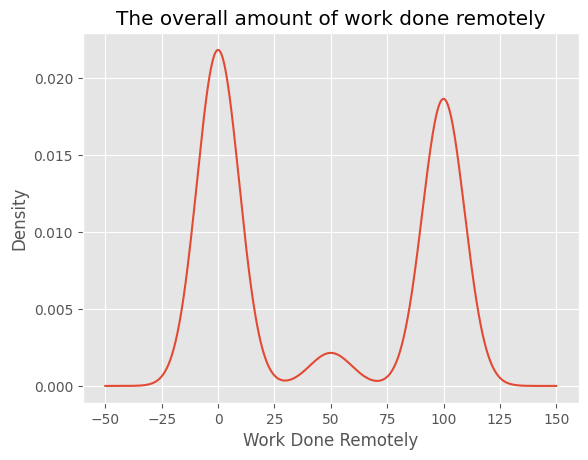

In [19]:
#remote_ratio: The overall amount of work done remotely
ax=df['remote_ratio'].plot(kind='kde',title="The overall amount of work done remotely")
ax.set_xlabel("Work Done Remotely")

Text(0.5, 0, 'Contracting Branch ')

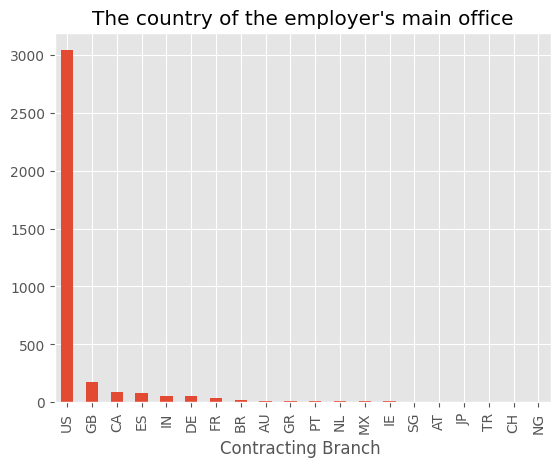

In [20]:
#company_location: The country of the employer's main office or contracting branch
ax=df['company_location'].value_counts().head(20).plot(kind='bar',title="The country of the employer's main office")
ax.set_xlabel("Contracting Branch ")

Text(0.5, 0, 'People Worked For The Company ')

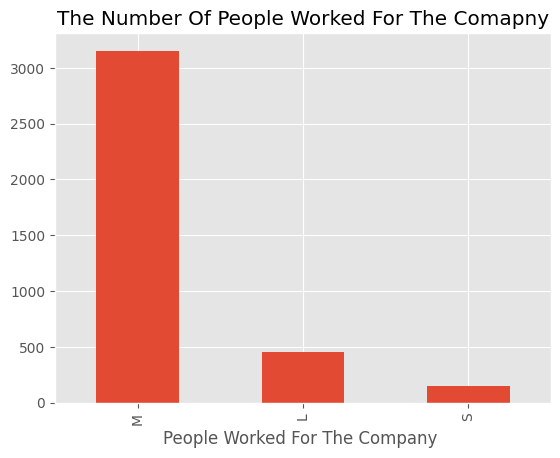

In [21]:
#company_size: The median number of people that worked for the company during the year
ax=df['company_size'].value_counts().head(20).plot(kind='bar',title="The Number Of People Worked For The Comapny")
ax.set_xlabel("People Worked For The Company ")

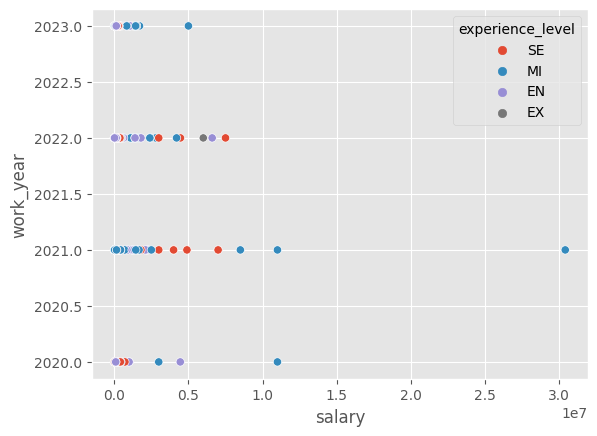

In [22]:
#FEATURE RELATIONSHIPS
sns.scatterplot(x="salary",y="work_year",hue="experience_level",data=df)
plt.show()

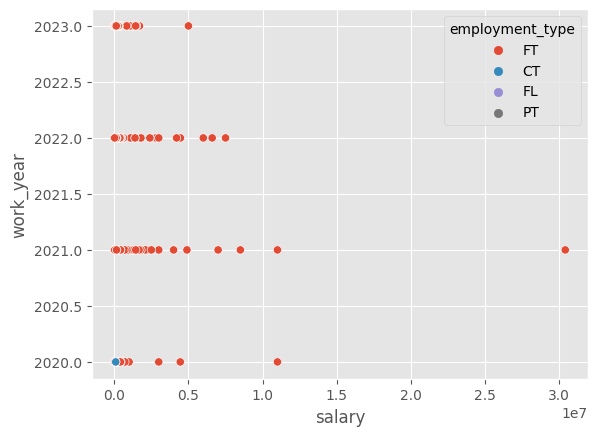

In [23]:
sns.scatterplot(x="salary",y="work_year",hue="employment_type",data=df)
plt.show()

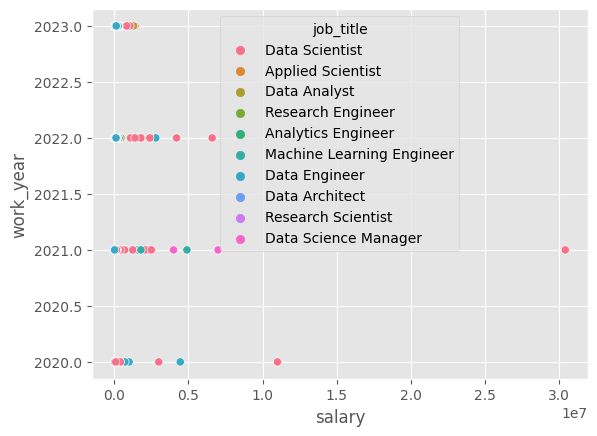

In [24]:
# 1. Count the frequency of each job title
job_counts = df['job_title'].value_counts()

# 2. Select the top 10 job titles based on frequency
top10_jobs = job_counts.nlargest(10).index.tolist()

# 3. Create a new dataframe with only the top 10 job titles
df_top10 = df[df['job_title'].isin(top10_jobs)]

# 4. Create a scatterplot with job title as the hue
sns.scatterplot(x="salary", y="work_year", hue="job_title", data=df_top10)
ax.legend(fontsize='small')
plt.show()

In [25]:
df_corr=df[['work_year','salary','salary_in_usd','remote_ratio']].corr()
df_corr

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.094724,0.228290,-0.236430
salary,-0.094724,1.000000,-0.023676,0.028731
salary_in_usd,0.228290,-0.023676,1.000000,-0.064171
remote_ratio,-0.236430,0.028731,-0.064171,1.000000


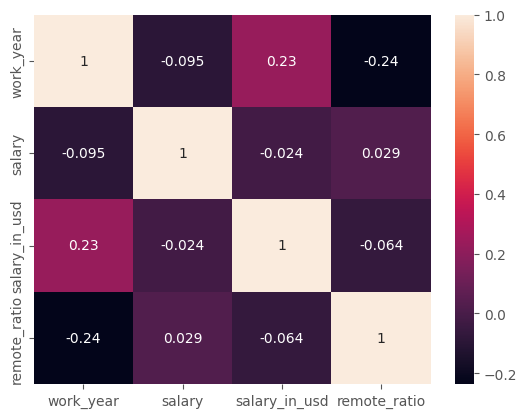

In [26]:
sns.heatmap(df_corr,annot=True)
plt.show()